---
20/06/2023

<img src="249 Analatica - Logo-18-1 (1).png" alt="Logo" style="display: block; margin-left: auto; margin-right: auto; width: 200px;">

# <p style="text-align: center;"><span style="color:#0077D4;">249Analytica Company</span></p>

---

# <p style="text-align: center;"><span style="color:black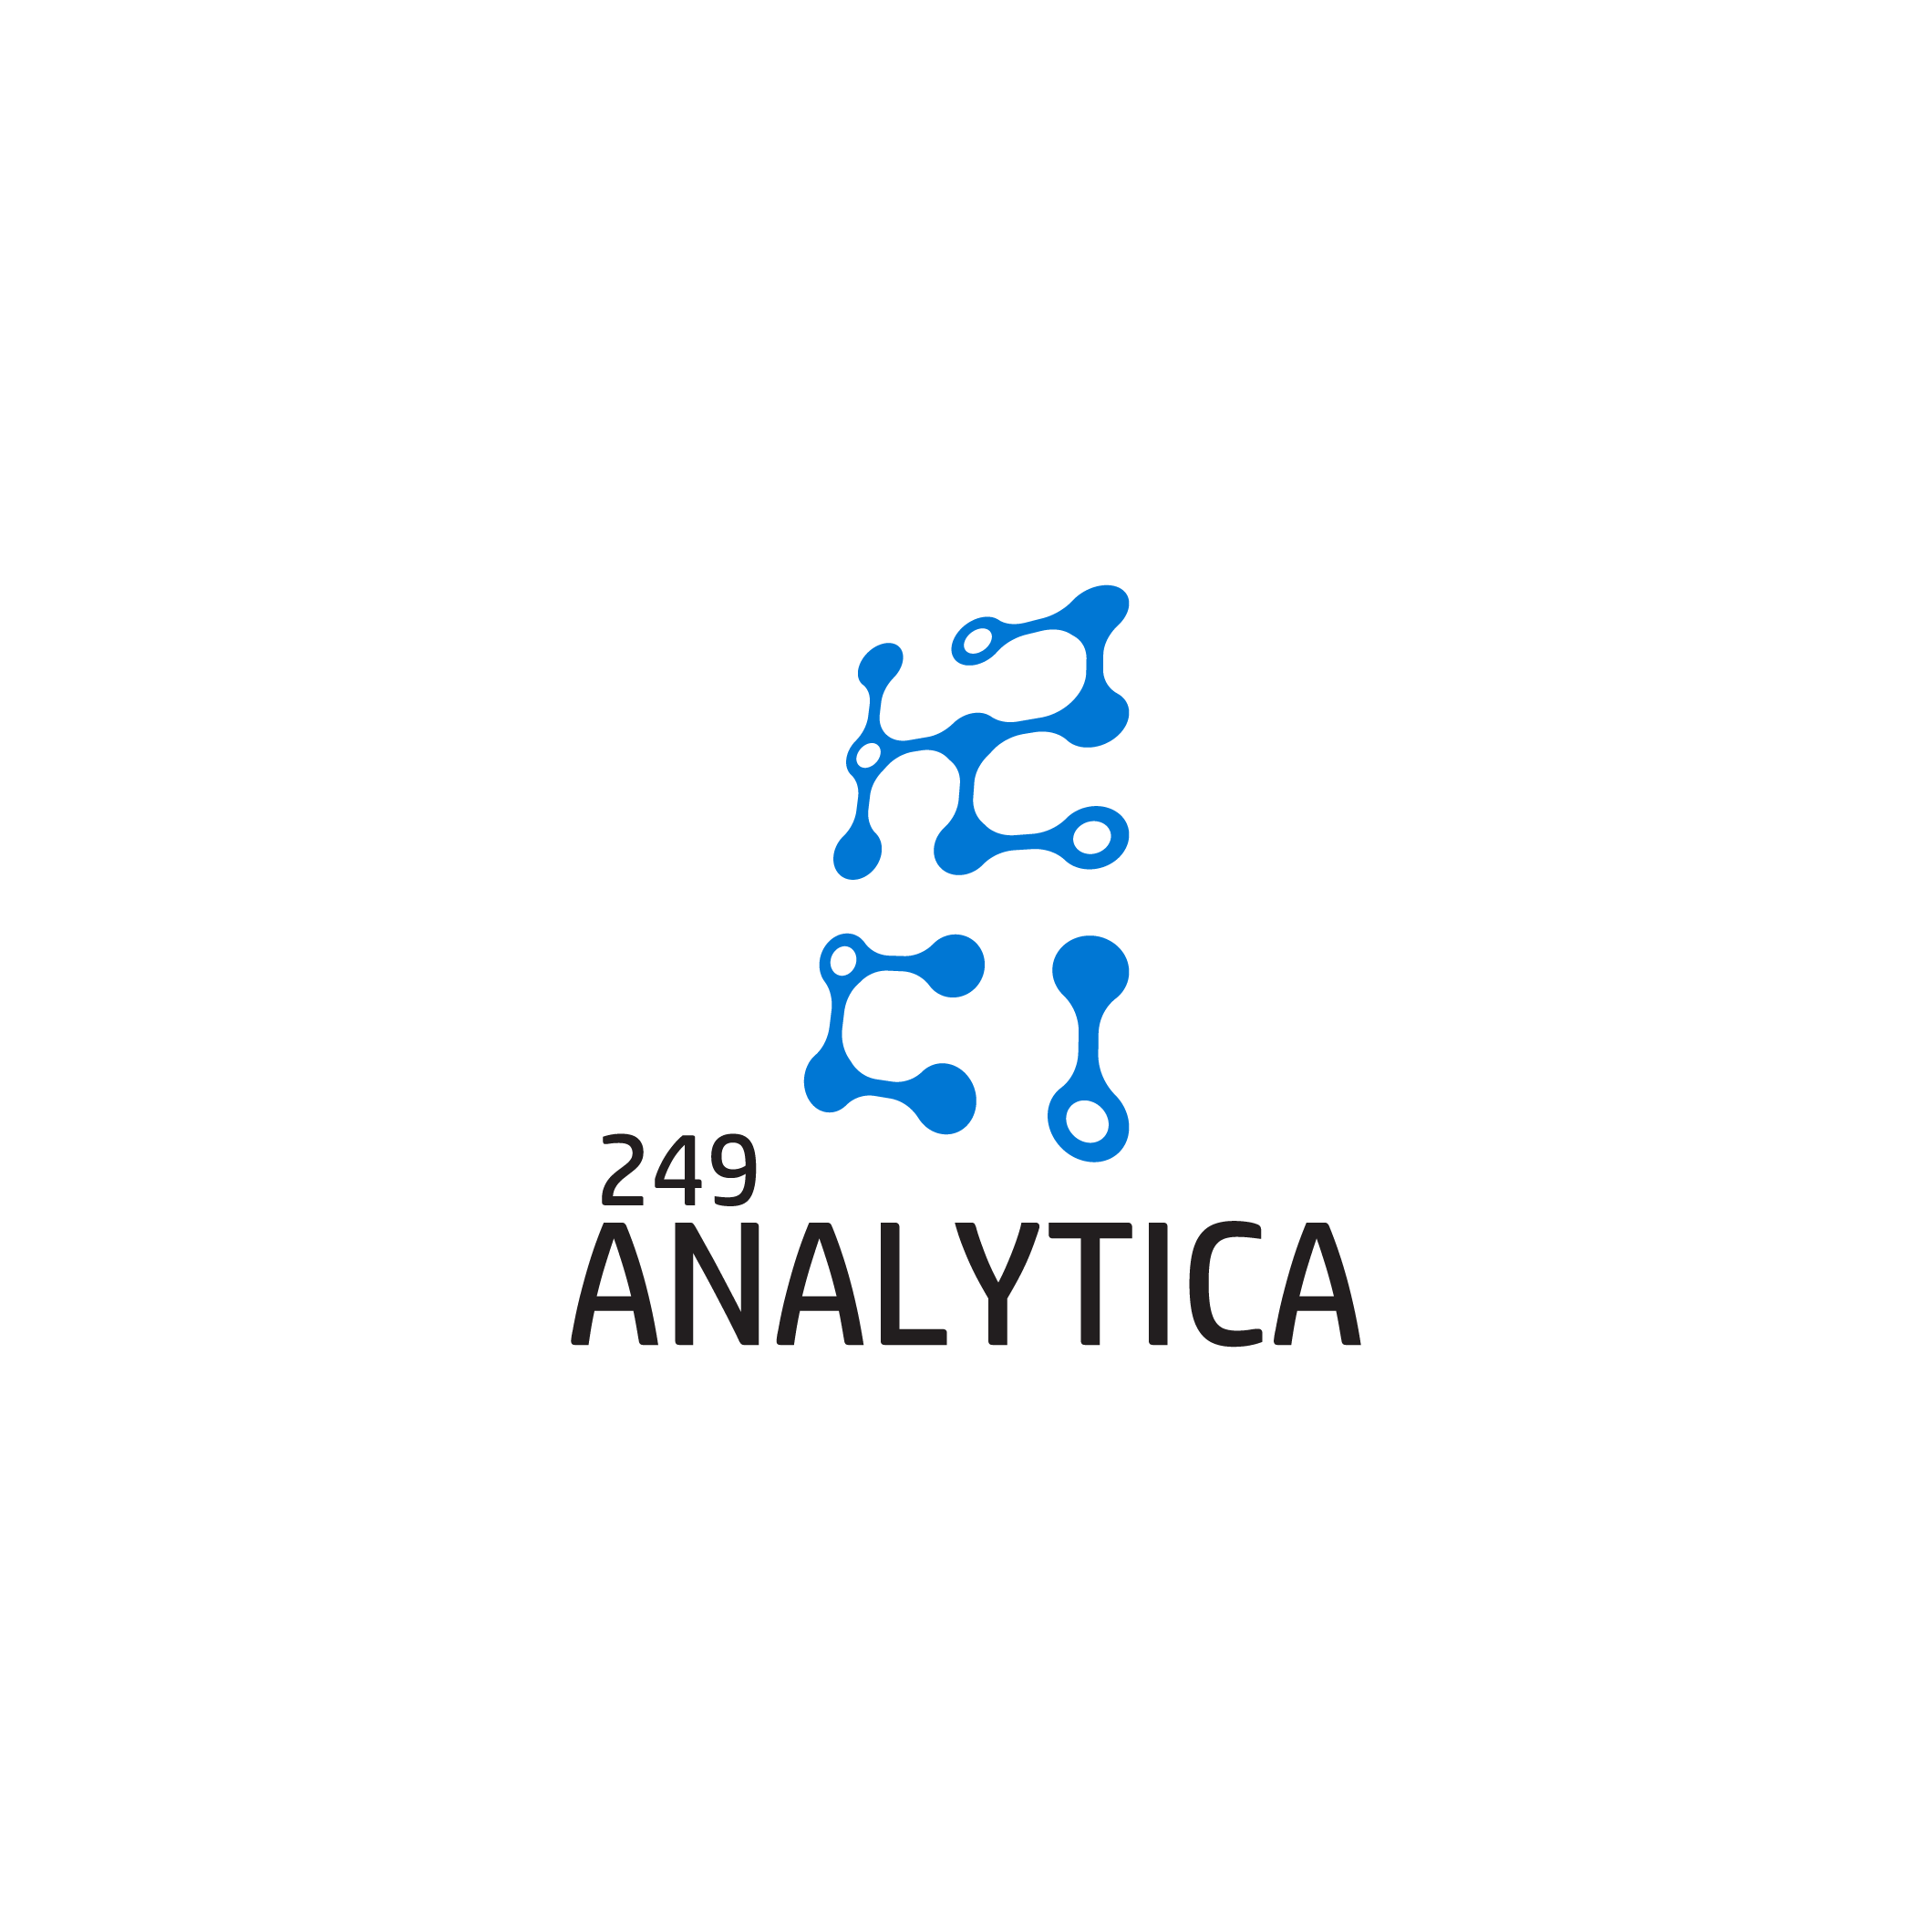;">Potato Disease Detection Model</span></p>

---
## Introduction:

The Malaria Detection project aimed to develop an automated system capable of accurately detecting malaria parasites from blood cell images. By leveraging deep learning techniques, I successfully trained a model that achieves high accuracy in malaria detection. This project showcases the potential of artificial intelligence in addressing critical healthcare challenges and improving disease diagnostics.

The dataset used for training and evaluation consists of images of potato plants, with annotations indicating their disease condition. The dataset includes three categories: healthy plants, plants infected with Late Blight, and plants infected with other diseases. The dataset was collected from various sources and carefully curated to ensure diversity and quality.

---
## Dataset:

The dataset used for training and evaluation consists of images of potato plants, with annotations indicating their disease condition. The dataset includes three categories: healthy plants, plants infected with Late Blight, and plants infected with Early Blight.

---
## Methodology:

- Data Preprocessing: The collected dataset was preprocessed to remove irrelevant or noisy data. Images were resized and converted to a standardized format. Labels indicating the disease condition of each image were assigned.

- Model Architecture: A CNN-based model was designed to learn the distinguishing features of healthy potato plants and those infected with Late Blight disease. The model architecture includes multiple convolutional and pooling layers, followed by fully connected layers for classification.

- Model Training: The model was trained on the preprocessed dataset using an iterative optimization algorithm called stochastic gradient descent (SGD). During training, the model learned to minimize a loss function by adjusting its internal parameters.

- Model Evaluation: The trained model was evaluated using a separate validation dataset.


---
# Essential Libraries and Modules 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

---
# Data Preparation and Path Handling

In [3]:
data_dir = 'C:/Users/DELL/Documents/Datasets/Plant Diseases Dataset/potato/train'

# Create paths for infected and uninfected images
healthy_path = os.path.join(data_dir, 'Potato___healthy')
Early_blight_path = os.path.join(data_dir, 'Potato___Early_blight')
Late_blight_path = os.path.join(data_dir, 'Potato___Late_blight')

# Read the images and create labels
healthy_images = [os.path.join(healthy_path, img) for img in os.listdir(healthy_path)]
Early_blight_images = [os.path.join(Early_blight_path, img) for img in os.listdir(Early_blight_path)]
Late_blight_images = [os.path.join(Late_blight_path, img) for img in os.listdir(Late_blight_path)]

# Create a dataframe to store image paths and labels
data = pd.DataFrame(
    {'image_path': healthy_images +
     Early_blight_images + 
     Late_blight_images,
    'label': ['Healthy'] * len(healthy_images) + 
     ['Infected: Early Blight'] * len(Early_blight_images) +
     ['Infected: Late Blight'] * len(Late_blight_images)})

In [3]:
data

,image_path,label
0,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
1,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
2,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
3,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
4,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
...,...,...
5697,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Late Blight
5698,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Late Blight
5699,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Late Blight
5700,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Late Blight


---
# Splitting Data into Training and Testing Sets

In [4]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
     data['image_path'], data['label'],
     test_size=0.1, random_state=42
)

---
# Data Loading and Preprocessing

In [5]:

# Load and preprocess training and testing images using ImageDataGenerator
image_generator = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True   
)

# Load and preprocess training images
train_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': train_data, 'label': train_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)

# Load and preprocess testing images
test_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': test_data, 'label': test_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)


Found 5131 validated image filenames belonging to 3 classes.
Found 571 validated image filenames belonging to 3 classes.


---
# Building (CNN) Model

In [6]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Adjust the number of units in the output layer based on the number of classes
num_classes = 3
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

---
# Evaluating and Visualizing Model Performance

In [7]:
# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images, epochs=30, 
    validation_data=test_images, 
    callbacks=[early_stopping]
)

Epoch 1/30
161/161 [==============================] - 45s 259ms/step - loss: 0.6918 - accuracy: 0.6599 - val_loss: 0.1816 - val_accuracy: 0.9335
Epoch 2/30
161/161 [==============================] - 31s 191ms/step - loss: 0.1912 - accuracy: 0.9332 - val_loss: 0.1552 - val_accuracy: 0.9527
Epoch 3/30
161/161 [==============================] - 31s 193ms/step - loss: 0.1575 - accuracy: 0.9456 - val_loss: 0.0599 - val_accuracy: 0.9737
Epoch 4/30
161/161 [==============================] - 31s 190ms/step - loss: 0.1420 - accuracy: 0.9528 - val_loss: 0.0947 - val_accuracy: 0.9615
Epoch 5/30
161/161 [==============================] - 31s 191ms/step - loss: 0.1108 - accuracy: 0.9614 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 6/30
161/161 [==============================] - 31s 190ms/step - loss: 0.0979 - accuracy: 0.9676 - val_loss: 0.0336 - val_accuracy: 0.9860
Epoch 7/30
161/161 [==============================] - 31s 191ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0942 - val_ac

---
# Evaluating and Visualizing Model Performance

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

18/18 [==============================] - 2s 106ms/step - loss: 0.0406 - accuracy: 0.9842
Test Loss: 0.04063139110803604
Test Accuracy: 0.9842382073402405


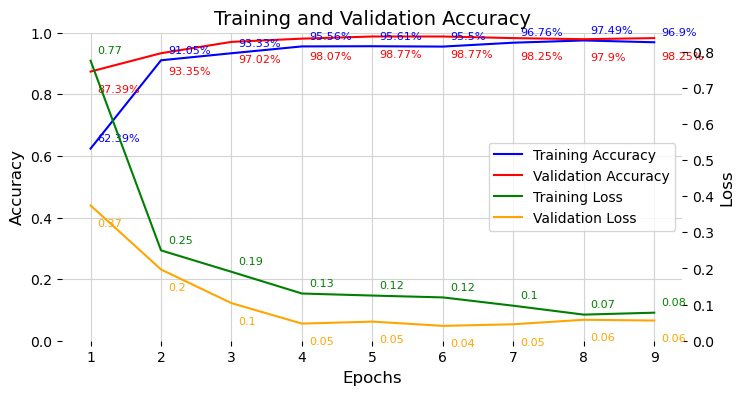

In [16]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create the figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the trend line for training accuracy
ax1.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the trend line for validation accuracy
ax1.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

# Set y-axis limits for accuracy
ax1.set_ylim([0, 1])

# Set plot title, x-axis label, and y-axis label for accuracy
ax1.set_title('Training and Validation Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)

# Create a twin y-axis for loss
ax2 = ax1.twinx()

# Plot the trend line for training loss
ax2.plot(epochs, training_loss, 'green', label='Training Loss')

# Plot the trend line for validation loss
ax2.plot(epochs, validation_loss, 'orange', label='Validation Loss')

# Set y-axis limits for loss
ax2.set_ylim([0, max(training_loss + validation_loss) * 1.1])

# Set y-axis label for loss
ax2.set_ylabel('Loss', fontsize=12)

# Remove the frames of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add gridlines
ax1.grid(color='lightgray', linestyle='-')

# Customize tick labels
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add labels to the data points for accuracy
for i, acc in enumerate(training_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='b'
    )
    
for i, acc in enumerate(validation_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='r'
    )

# Add labels to the data points for loss
for i, loss in enumerate(training_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='green'
    )
    
for i, loss in enumerate(validation_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='orange'
    )

# Combine the legend for accuracy and loss and position it in the middle right
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, fontsize=10, loc='center right')

# Save the plot as an image
plt.savefig('Accuracy and Loss Trend.png', dpi=300)

# Display the plot
plt.show()


The model's accuracy and loss trend can be visualized using line plots. The x-axis represents the number of training epochs, while the y-axis represents the corresponding accuracy or loss value. Below are the accuracy and loss trend plots:

---
# Conclusion:

The developed Potato Disease Detection model shows great potential in accurately identifying the presence of Late Blight disease in potato plants. With an impressive test accuracy of 98.42% and the ability to correctly classify healthy and infected potato plants, the model can effectively aid stakeholders in early detection and management of diseased potato plants. This technology has the potential to significantly benefit the agricultural industry by enabling timely interventions and reducing crop losses. Further refinements and optimizations can be explored to enhance the model's performance and expand its application to other potato diseases.